In [22]:
%pylab inline
from TB.c import *
import seaborn as sns

import matplotlib.patches as patches


sns.set_context('paper')
sns.set_style('white')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/swacker/miniconda3/envs/lrg/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['arrow', 'subplots']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [23]:
NAME = 'Figure'

In [24]:
from ms_mint.io import ms_file_to_df

fn = '/data/Metabolomics/ms-mint/230508__ms-mint-demofiles//ms-files/EC_B1.mzXML'
df = ms_file_to_df(fn)

In [25]:
sns.set_context('paper')

In [26]:
sample_type_order = ['Biological sample', 'Conditioning', 'Standard', 'Blank']

In [27]:
def plot1(ax):
    mz = 117.0194244384765
    rt = 122.634
    dm = mz * 5 / 10.**6.
    dt = 120
    
    sl = df[(df.scan_time-rt).abs()<=dt]
    
    sl = sl[(sl.mz-mz).abs()<=dm]
        
    for _ in range(5):
        dx = np.random.normal(size=1)[0] * 10
        dy = 0 #dm * np.random.normal(size=1)[0] / 10
        ax.plot([dx+rt-dt/2, dx+rt+dt/2, dx+rt+dt/2, dx+rt-dt/2, dx+rt-dt/2], 
                [dy+mz-dm/2, dy+mz-dm/2, dy+mz+dm/2, dy+mz+dm/2, dy+mz-dm/2], 
                [0]*5, lw=.5)
    
    
    ax.scatter(sl.scan_time, sl.mz, sl.intensity, color='k', s=1)
    ax.plot(sl.scan_time, sl.mz, sl.intensity, lw=.5, color='k')
    
    ax.set_xlabel('Rt')
    ax.set_ylabel('m/z')
    ax.set_zlabel('Intensity')
    #ax.xaxis.labelpad = -15
    #ax.yaxis.labelpad = -15
    ax.zaxis.labelpad = -15
    
    # Move xticks closer to the axis
    for tick in ax.xaxis.get_major_ticks():
        tick.set_pad(-5)
        
    # Move xticks closer to the axis
    for tick in ax.yaxis.get_major_ticks():
        tick.set_pad(-5)
        
    ax.set_xticks([rt-dt/2, rt+dt/2], ['rt_min', 'rt_max'], rotation=0, horizontalalignment="right", rotation_mode='anchor')
    ax.set_yticks([mz-dm/2, mz+dm/2], ['mz+Δm', 'mz-Δm'], rotation=0, horizontalalignment="left", rotation_mode='anchor')
    ax.set_zticks([])
    ax.set_title('Conventional')

    ax.set_ylim(mz-dm, mz+dm)
    ax.set_zlim(0,None)
    
    azm=ax.azim
    ele=ax.elev
    
    azm = -45
    ele = 20
    ax.view_init(elev=ele, azim=azm)    
        

In [28]:
def plot2(ax):
    mz = 117.0194244384765
    rt = 122.634
    dm = mz * 5 / 10.**6.
    dt = 120
    
    sl = df[(df.scan_time-rt).abs()<=dt]
    
    sl = sl[(sl.mz-mz).abs()<=dm]
        
    ax.plot([rt-dt/2, rt+dt/2, rt+dt/2, rt-dt/2, rt-dt/2], 
            [mz-dm/2, mz-dm/2, mz+dm/2, mz+dm/2, mz-dm/2], 
            [0]*5, lw=2, color='red')
    
    ax.scatter(sl.scan_time, sl.mz, sl.intensity, color='k',s=1)
    ax.plot(sl.scan_time, sl.mz, sl.intensity, lw=.5, color='k')

    ax.set_xlabel('Rt')
    ax.set_ylabel('m/z')
    ax.set_zlabel('Intensity')
    
    ax.set_xticks([rt-dt/2, rt+dt/2], ['rt_min', 'rt_max'], rotation=0, horizontalalignment="right", rotation_mode='anchor')
    ax.set_yticks([mz-dm/2, mz+dm/2], ['mz+Δm', 'mz-Δm'], rotation=-0, horizontalalignment="left", rotation_mode='anchor')
    ax.set_zticks([])
    ax.set_title('ms-mint')
    #ax.xaxis.labelpad = -15
    #ax.yaxis.labelpad = -15
    ax.zaxis.labelpad = -15
    
    # Move xticks closer to the axis
    for tick in ax.xaxis.get_major_ticks():
        tick.set_pad(-5)
        
    # Move xticks closer to the axis
    for tick in ax.yaxis.get_major_ticks():
        tick.set_pad(-5)

    ax.set_ylim(mz-dm, mz+dm)
    ax.set_zlim(0,None)
    
    azm=ax.azim
    ele=ax.elev
    
    azm = -45
    ele = 20
    ax.view_init(elev=ele, azim=azm)


In [29]:
merged = pd.read_parquet('output/maven-mint-results.parquet').rename(columns={'sample_type': 'Sample type'})
merged.columns

Index(['peak_label', 'ms_file_label', 'Maven', 'ms_file', 'mz_mean',
       'mz_width', 'rt', 'rt_min', 'rt_max', 'rt_unit', 'intensity_threshold',
       'target_filename', 'peak_area', 'ms-mint', 'peak_n_datapoints',
       'peak_max', 'peak_rt_of_max', 'peak_min', 'peak_median', 'peak_mean',
       'peak_delta_int', 'peak_shape_rt', 'peak_shape_int',
       'peak_mass_diff_25pc', 'peak_mass_diff_50pc', 'peak_mass_diff_75pc',
       'peak_score', 'total_intensity', 'ms_file_size_MB', 'μ', 'abs(μ)',
       'run_order', 'column', 'Sample type', 'conditioning_run_nbr'],
      dtype='object')

In [30]:
merged.peak_label.unique()

array(['Acetoacetate', 'N-Acetyl-Threonine', 'Adenine', 'Alanine',
       'Alpha Ketoglutarate', 'Arabitol', 'Arginine', 'Asparagine',
       'Aspartate', 'Carnosine', 'Citrulline', 'Cystine', 'Cytidine',
       'Dihydroorotate', 'Fumarate', 'Glucose', 'Glucose-6-Phosphate',
       'Glutamate', 'Glutamine', 'Histidine', 'Itaconate', 'Leucine',
       'Lysine', 'Methionine', 'Methionine Sulfoxide', 'Mevalonate',
       'Myoinositol', 'N-Acetyl-Aspartate', 'N-Acetyl-Glutamate',
       'N-Acetyl-Glutamine', 'N-Acetyl-Glycine', 'N-Acetyl-Leucine',
       'N-Acetyl-Methionine', 'N-Acetyl-Phenylalanine', 'Nicotinate',
       'O-Phospho-L-Serine', 'Ornithine', 'Orotate', 'Pantothenic acid',
       'Phenylalanine', 'Serine', 'Shikimate', 'Succinate', 'Threonine',
       'Thymine', 'Trehalose', 'Tryptophan', 'Tyrosine', 'Uracil',
       'Urate', 'Uridine', 'Urocanate', 'Valine', 'Xanthine',
       'Xanthosine'], dtype=object)

In [31]:
merged

,peak_label,ms_file_label,Maven,ms_file,mz_mean,mz_width,rt,rt_min,rt_max,rt_unit,intensity_threshold,target_filename,peak_area,ms-mint,peak_n_datapoints,peak_max,peak_rt_of_max,peak_min,peak_median,peak_mean,peak_delta_int,peak_shape_rt,peak_shape_int,peak_mass_diff_25pc,peak_mass_diff_50pc,peak_mass_diff_75pc,peak_score,total_intensity,ms_file_size_MB,μ,abs(μ),run_order,column,Sample type,conditioning_run_nbr
0,Acetoacetate,2021_12_24RG_Col03_Conditioning1,76939.39,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col03_Conditioning1.mzXML,101.0244,10,41.4,40.1008,46.9328,s,0,targets.csv,993674.0,76939.0,26,83908.0,44.640499,11425.0,32151.0,3.821823e+04,30728.0,"40.17,40.44,40.7,40.96,41.22,41.49,41.75,42.01,42.28,42.54,42.8,43.06,43.33,43.59,43.85,44.12,44...","48854,25556,29227,19664,32334,44594,35160,75068,77507,83908,69402,62079,39122,43480,40098,30517,...",-1.748809,-1.560008,-1.446728,0,126370541552,15.176873,-0.000507,0.000507,14,Col03,Conditioning,1.0
1,N-Acetyl-Threonine,2021_12_24RG_Col03_Conditioning1,2587217.00,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col03_Conditioning1.mzXML,160.0615,10,93.0,90.1558,97.2000,s,0,targets.csv,29120777.0,2609521.0,27,2738843.0,90.425301,192134.0,751702.0,1.078547e+06,396425.0,"90.16,90.43,90.69,90.99,91.25,91.51,91.78,92.04,92.3,92.57,92.83,93.09,93.35,93.62,93.88,94.14,9...","208998,339168,595053,1007015,1623051,2013774,2461297,2568241,2738843,2521480,2297701,1822670,150...",-1.569526,-1.474195,-1.378865,0,126370541552,15.176873,0.854716,0.854716,14,Col03,Conditioning,1.0
2,Adenine,2021_12_24RG_Col03_Conditioning1,66484.43,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col03_Conditioning1.mzXML,134.0472,10,88.8,81.0000,99.0000,s,0,targets.csv,1077527.0,66484.0,34,74576.0,93.091499,9141.0,24241.0,3.169197e+04,11890.0,"83.33,84.38,84.64,84.91,85.7,86.48,86.75,87.01,87.27,87.54,87.8,88.06,88.32,88.59,88.85,89.11,89...","14655,20870,14753,17041,19937,13988,36610,25119,46407,35230,56357,51618,74576,73258,57498,49819,...",-2.538351,-2.196856,-1.855362,0,126370541552,15.176873,-0.000647,0.000647,14,Col03,Conditioning,1.0
3,Alanine,2021_12_24RG_Col03_Conditioning1,207952.05,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col03_Conditioning1.mzXML,88.0404,10,126.6,123.0000,129.6000,s,0,targets.csv,1657412.0,207951.0,20,247431.0,124.945999,17153.0,62421.5,8.287060e+04,3314.0,"124.16,124.68,124.95,125.21,125.47,125.73,126.0,126.26,126.52,126.79,127.05,127.31,127.57,127.84...","46522,45243,17153,33145,26861,50347,81169,125389,194317,247431,182106,114637,79516,58740,72478,6...",-1.413286,-1.239970,-1.153312,0,126370541552,15.176873,-0.000505,0.000505,14,Col03,Conditioning,1.0
4,Alpha Ketoglutarate,2021_12_24RG_Col03_Conditioning1,575102.44,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col03_Conditioning1.mzXML,145.0143,10,123.0,118.8000,127.2000,s,0,targets.csv,2051154.0,575102.0,6,656223.0,123.894997,79765.0,280463.0,3.418590e+05,59619.0,"122.58,122.84,123.11,123.37,123.63,123.89","139384,421542,656223,647541,106699,79765",-2.937269,-2.542684,-2.148099,0,126370541552,15.176873,-0.000077,0.000077,14,Col03,Conditioning,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183310,Uridine,2021_12_24RG_Col04_Rep16_Std6,7271070.50,/data/Metabolomics/221207__LSARP-conditioning/mzXML/2021_12_24RG_Col04_Rep16_Std6.mzXML,243.0623,10,73.8,66.0000,87.0000,s,0,targets.csv,172519816.0,7353481.0,77,7909085.0,67.105400,9277.0,421534.0,2.240517e+06,22413.0,"66.05,67.11,67.37,67.63,67.89,68.16,68.42,68.68,68.94,69.21,69.47,69.73,70.0,70.26,70.52,70.78,7...","9277,12192,19237,42444,82411,141463,304402,619157,1232253,2159474,2790631,3742715,5016176,521094...",-2.316029,-2.253252,-2.127698,0,104719727117,13.674614,1.120700,1.120700,3193,Col04,Standard,NaN
183311,Urocanate,2021_12_24RG_Col04_Rep16_Std6,23858186.00,/data/Metabolomi

In [33]:
ndx = merged[ (merged.conditioning_run_nbr <= 100) & (merged['Sample type'] == 'Biological sample') ].index

In [34]:
merged.loc[ndx, 'Sample type'] = 'Conditioning'

In [35]:
merged['Sample type'].value_counts()

Sample type
Conditioning    172700
Standard         10560
Blank               55
Name: count, dtype: int64

In [36]:
def plot3(ax):
    g = sns.scatterplot(data=merged, x='Maven', y='ms-mint', alpha=.5, hue='Sample type', legend=True, hue_order=sample_type_order)
    ax.set_xlabel("Maven")
    ax.set_ylabel("ms-mint")
    plt.sca(ax)
    plot_diagonal(color='k', ls='--', lw=.5)
    ax.set_title('Linear scale')

    # Get the current legend
    old_legend = g.legend_
    
    # Remove the current legend
    old_legend.remove()

    # Extract the legend labels as strings
    #labels = [old_legend.get_title().get_text()+''] + [text.get_text() for text in old_legend.texts]
    labels = [text.get_text() for text in old_legend.texts]

    # Create a "dummy" artist for the title
    #title_dummy = Line2D([], [], marker='None', markersize=0, color='None')

    # Extract the legend handles (colors and markers)
    #handles = [title_dummy] + old_legend.legendHandles  # None to accommodate the title
    handles = old_legend.legendHandles  # None to accommodate the title

    # Create a new legend with the desired number of columns
    new_legend = g.legend(#title=old_legend.get_title().get_text(), 
                          loc='upper left', 
                          labels=labels, 
                          handles=handles,
                          #bbox_to_anchor=(0, 1.3), 
                          #ncol=4, 
                          frameon=False,
                          fontsize=7,
                          handlelength=0.5)

In [37]:
def plot4(ax):
    g = sns.scatterplot(data=merged[merged.peak_label != 'Myoinositol'], x='Maven', y='ms-mint', alpha=.5, hue='Sample type', legend=False, hue_order=sample_type_order)
    ax.set_xlabel("Maven")
    ax.set_ylabel("ms-mint")
    plt.sca(ax)
    g.set(xscale='log', yscale='log')
    plot_diagonal(color='k', ls='--', lw=.5)
    ax.set_title('Logarithmic scale')


In [38]:
def plot5(ax):
    merged[merged.peak_label != 'Myoinositol']['μ'].hist(range=(-100, 100), bins=20, ax=ax, color='grey')
    #merged['Error'].plot.violin(ax=ax)
    #sns.violinplot(x=merged['Error'], ax=ax)
    
    sns.despine()
    grid()
    xlabel('$\mu$ [%]')
    ylabel('Count')
    
    
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), 
                        useOffset=None, useLocale=None, useMathText=None)
    
    ax.set_title('Percentage error')

In [39]:
def plot6(ax):
    #corr = merged.groupby(['peak_label'])[['ms-mint', 'Maven']].corr().reset_index(level=0).loc['Maven', ['peak_label', 'ms-mint']].set_index('peak_label').sort_values('ms-mint', ascending=False).rename(columns={'ms-mint': 'Pearson Correlation Coefficient'})
    r2_scores.plot.bar(y='R2 scores', legend=False, color='0.5', ax=ax)
    ax.set_ylabel('R2')
    ax.set_xlabel('Metabolite')
    ax.set_title('R2 score by metabolite')
    ax.tick_params(axis='both', which='major', labelsize=8)


In [40]:
from sklearn.metrics import r2_score

In [41]:

# Custom function to calculate R^2
def calculate_r2(group):
    corr_coeff = group['ms-mint'].corr(group['Maven'])
    r2 = corr_coeff**2
    return r2

# Group the DataFrame and apply the custom function
r2_scores = merged.groupby('peak_label').apply(calculate_r2).sort_values(ascending=False)
r2_scores

peak_label
Serine                    1.000000
Orotate                   1.000000
Urocanate                 1.000000
Arginine                  1.000000
Lysine                    1.000000
Glutamate                 1.000000
Histidine                 1.000000
Dihydroorotate            1.000000
Carnosine                 1.000000
N-Acetyl-Glutamine        1.000000
Asparagine                1.000000
Methionine Sulfoxide      1.000000
Nicotinate                1.000000
Cystine                   1.000000
Ornithine                 1.000000
Shikimate                 1.000000
Aspartate                 1.000000
Alpha Ketoglutarate       1.000000
Mevalonate                1.000000
N-Acetyl-Threonine        1.000000
Citrulline                1.000000
N-Acetyl-Methionine       1.000000
Threonine                 1.000000
N-Acetyl-Phenylalanine    1.000000
Methionine                1.000000
Tryptophan                1.000000
N-Acetyl-Glutamate        1.000000
Adenine                   1.000000
N-Acetyl-

# Figure 1

Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/pdf/Figure__1.pdf
Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/png/Figure__1.png
Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/svg/Figure__1.svg


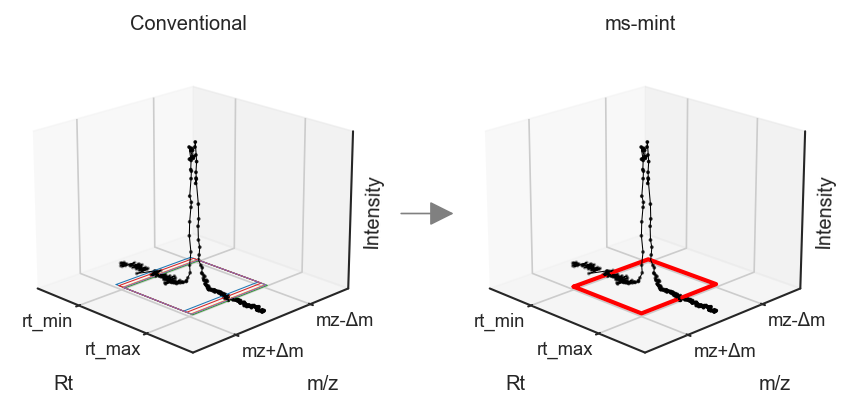

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Create the figure and GridSpec for the subplot grid
fig = plt.figure(figsize=(7, 3))
gs = GridSpec(1, 6, width_ratios=[1]*6, wspace=1.5, hspace=.5)

# Plot on the subplots
ax1 = fig.add_subplot(gs[0, :3], projection='3d')
plot1(ax1)

ax2 = fig.add_subplot(gs[0, 3:], projection='3d')
plot2(ax2)

# Adding an arrow across subplots
arrow_start = (0.5, 0.5)  # Start of the arrow
arrow_end = (0.55, 0.5)  # End of the arrow
arrow = patches.ConnectionPatch(arrow_start, arrow_end, "figure fraction", "figure fraction",
                                arrowstyle="-|>", mutation_scale=25, fc="grey", color='grey')
fig.add_artist(arrow)


sf('1', NAME, dpi=300)

# Figure 2

/tmp/ipykernel_1861754/1247854868.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles  # None to accommodate the title


Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/pdf/Figure__2.pdf
Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/png/Figure__2.png
Saved: /media/faststorage/Projects/230508-sw__mint-publication/LSARP-Conditioning/output/Figure/svg/Figure__2.svg


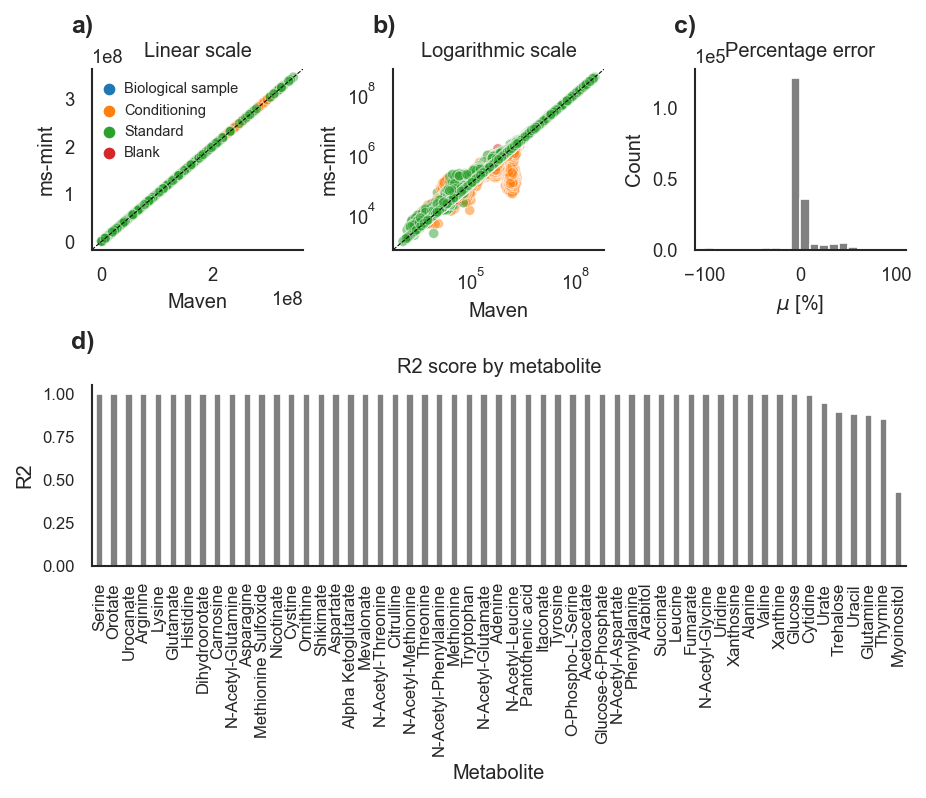

In [43]:
# Create the figure and GridSpec for the subplot grid
fig = plt.figure(figsize=(7, 4.3))
gs = GridSpec(2, 6, width_ratios=[1]*6, height_ratios=[1, 1], wspace=1.5, hspace=.75)

ax3 = fig.add_subplot(gs[0, :2])
plot3(ax3)

ax4 = fig.add_subplot(gs[0, 2:4])
plot4(ax4)

ax5 = fig.add_subplot(gs[0, 4:])
plot5(ax5)

ax6 = fig.add_subplot(gs[1, :])
plot6(ax6)

# Show the figure
sns.despine()

labels = ['a)', 'b)', 'c)', 'd)']
subplots = [ax3, ax4, ax5, ax6]

for i, ax in enumerate(subplots):
    ax.annotate(labels[i], xy=(0.0, 1.2), xycoords='axes fraction', 
                xytext=(-10, 0), textcoords='offset points', 
                fontsize=12, fontweight='bold')
    
sf('2', NAME, dpi=300)